In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Connectivity Data.csv')
df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Rank importance_7,Rank importance_8,Rank importance_9,Device_usage_edtech,Teacher_gender,MiSchool_Usage,MiSchoolProductivity,MiSchool comment,MiSchool_Ease,MiSchool_Enjoyment
0,21-01-23 21:00,21-01-23 21:06,IP Address,115.186.132.42,100,367,True,21-01-23 21:06,R_1FnsLVLB15fMbzq,NaN,...,7,8,9,Less than 1 year\n,Male,120,5,-,2,2
1,21-01-23 21:07,21-01-23 21:11,IP Address,115.186.132.42,100,237,True,21-01-23 21:11,R_3imwjdIVQhTBdKm,NaN,...,3,8,9,Less than 2 years\n,Female,30,2,-,2,5
2,21-01-23 21:11,21-01-23 21:16,IP Address,115.186.132.42,100,249,True,21-01-23 21:16,R_yjpJ3LWlmmcpah3,NaN,...,8,7,9,Less than 1 year\n,Female,30,3,-,2,5
3,21-01-23 21:16,21-01-23 21:24,IP Address,115.186.132.42,100,466,True,21-01-23 21:24,R_1DzKBh6gs69OTSV,NaN,...,8,2,9,Less than 1 year\n,Female,20,3,-,2,4
4,21-01-23 21:24,21-01-23 21:29,IP Address,115.186.132.42,100,303,True,21-01-23 21:29,R_334ohG25isuinwO,NaN,...,4,2,9,Less than 1 year\n,Female,15,4,I am used to this tool therefore I prefer it t...,3,4


In [3]:
df = df.drop(columns=['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 
                      'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 
                      'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage', 
                      'Device ownership_4_TEXT', 'Device brand', 'Device_connectivity', 'Service provider_6_TEXT', 
                      'Reason to stay', 'Reason to stay_7_TEXT', 'Device usage', 'Device usage_6_TEXT', 'School name', 
                      'Class taught', 'Most important', 'Rank importance_1', 'Rank importance_2', 'Rank importance_3',
                      'Rank importance_4', 'Rank importance_5', 'Rank importance_6', 'Rank importance_7', 
                      'Rank importance_8', 'Rank importance_9', 'MiSchool comment'])
df.head()

,Primary_Device,Device_ownership,Device_duration,Connection_Frequency,Download_speed,Upload_speed,Service_provider,Service_type,Service_payer,Service_expenditure,...,Device_usage_overall,Class_size,Teaching_experience,Teacher_age,Device_usage_edtech,Teacher_gender,MiSchool_Usage,MiSchoolProductivity,MiSchool_Ease,MiSchool_Enjoyment
0,Smartphone,I own it,2.0,A few times a day,1.35,0.03,Telenor,Prepaid,Own self,1500,...,More than 5 years\n,25,19.0,43,Less than 1 year\n,Male,120,5,2,2
1,Smartphone,I own it,2.0,A few times a day,0.00,0.00,Telenor,Prepaid,Own self,700,...,More than 5 years\n,20,11.0,42,Less than 2 years\n,Female,30,2,2,5
2,Smartphone,I own it,2.0,A few times a day,0.00,0.00,Telenor,Prepaid,Own self,700,...,Less than 5 years\n,30,22.0,50,Less than 1 year\n,Female,30,3,2,5
3,Smartphone,I own it,1.0,A few times a day,0.00,0.00,Telenor,Prepaid,Own self,700,...,More than 5 years\n,20,12.0,43,Less than 1 year\n,Female,20,3,2,4
4,Smartphone,I own it,2.0,A few times a day,0.00,0.00,Zong,Prepaid,Own self,3500,...,Less than 5 years\n,34,22.0,43,Less than 1 year\n,Female,15,4,3,4


In [4]:
df.describe()

,Device_duration,Download_speed,Upload_speed,Service_expenditure,Device_usage_time_1,Class_size,Teaching_experience,Teacher_age,MiSchool_Usage,MiSchoolProductivity,MiSchool_Ease,MiSchool_Enjoyment
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,2.766264,8.610440,10.761868,1302.274725,3.208791,37.736264,42.142857,40.560440,40.098901,11.857143,2.120879,3.846154
std,2.934313,22.246196,52.291549,812.789286,1.426078,41.799478,255.256312,9.783443,32.756019,23.055764,0.490695,1.307441
min,0.000000,0.000000,0.000000,7.000000,1.000000,9.000000,0.500000,1.000000,3.000000,0.000000,1.000000,1.000000
25%,1.000000,1.375000,0.600000,750.000000,2.000000,24.500000,10.500000,34.000000,20.000000,2.000000,2.000000,3.000000
50%,2.000000,3.000000,2.900000,1000.000000,3.000000,34.000000,16.000000,42.000000,30.000000,5.000000,2.000000,4.000000
75%,3.000000,9.200000,8.900000,1750.000000,4.000000,43.500000,21.500000,47.500000,47.500000,15.000000,2.000000,5.000000
max,20.000000,200.000000,500.000000,4500.000000,6.000000,408.000000,2449.000000,57.000000,202.000000,200.000000,4.000000,5.000000


In [5]:
df = df.rename(columns={'Device_duration': 'Device_age', 'MiSchool_Usage': 'Time_Spent_Daily', 'MiSchoolProductivity': 'Time_For_Upload'})

In [6]:
median_device = df.loc[df['Device_age']<10, 'Device_age'].median()
df['Device_age'] = np.where(df['Device_age'] >10, median_device, df['Device_age'])

median_download = df.loc[df['Download_speed']<100, 'Download_speed'].median()
df['Download_speed'] = np.where(df['Download_speed'] >100, median_download, df['Download_speed'])

median_upload = df.loc[df['Upload_speed']<100, 'Upload_speed'].median()
df['Upload_speed'] = np.where(df['Upload_speed'] >100, median_upload, df['Upload_speed'])

median_expenditure = df.loc[df['Service_expenditure']>100, 'Service_expenditure'].median()
df['Service_expenditure'] = np.where(df['Service_expenditure'] <100, median_expenditure, df['Service_expenditure'])

median_class = df.loc[df['Class_size']<100, 'Class_size'].median()
df['Class_size'] = np.where(df['Class_size'] >100, median_class, df['Class_size'])

median_teaching = df.loc[df['Teaching_experience']<100, 'Teaching_experience'].median()
df['Teaching_experience'] = np.where(df['Teaching_experience'] >100, median_teaching,
                                     df['Teaching_experience'])

median_age = df.loc[df['Teacher_age']>10, 'Teacher_age'].median()
df['Teacher_age'] = np.where(df['Teacher_age'] <10, median_age, df['Teacher_age'])

median_usage = df.loc[df['Time_Spent_Daily']<150, 'Time_Spent_Daily'].median()
df['Time_Spent_Daily'] = np.where(df['Time_Spent_Daily'] >150, median_usage,
                                     df['Time_Spent_Daily'])

median_quiz = df.loc[df['Time_For_Upload']<100, 'Time_For_Upload'].median()
df['Time_For_Upload'] = np.where(df['Time_For_Upload'] >100, median_quiz,
                                     df['Time_For_Upload'])
df.describe()

,Device_age,Download_speed,Upload_speed,Service_expenditure,Device_usage_time_1,Class_size,Teaching_experience,Teacher_age,Time_Spent_Daily,Time_For_Upload,MiSchool_Ease,MiSchool_Enjoyment
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,2.458571,6.445604,5.298681,1313.186813,3.208791,33.615385,15.401099,41.016484,38.208791,9.714286,2.120879,3.846154
std,2.068850,9.138097,6.740570,801.797812,1.426078,14.387316,8.623682,8.840705,27.914758,11.581869,0.490695,1.307441
min,0.000000,0.000000,0.000000,350.000000,1.000000,9.000000,0.500000,21.000000,3.000000,0.000000,1.000000,1.000000
25%,1.000000,1.375000,0.600000,750.000000,2.000000,24.500000,10.500000,35.000000,20.000000,2.000000,2.000000,3.000000
50%,2.000000,3.000000,2.850000,1000.000000,3.000000,33.000000,15.500000,42.500000,30.000000,5.000000,2.000000,4.000000
75%,3.000000,9.050000,7.850000,1750.000000,4.000000,42.500000,21.000000,47.500000,45.000000,12.500000,2.000000,5.000000
max,10.000000,56.800000,31.300000,4500.000000,6.000000,85.000000,36.000000,57.000000,120.000000,50.000000,4.000000,5.000000


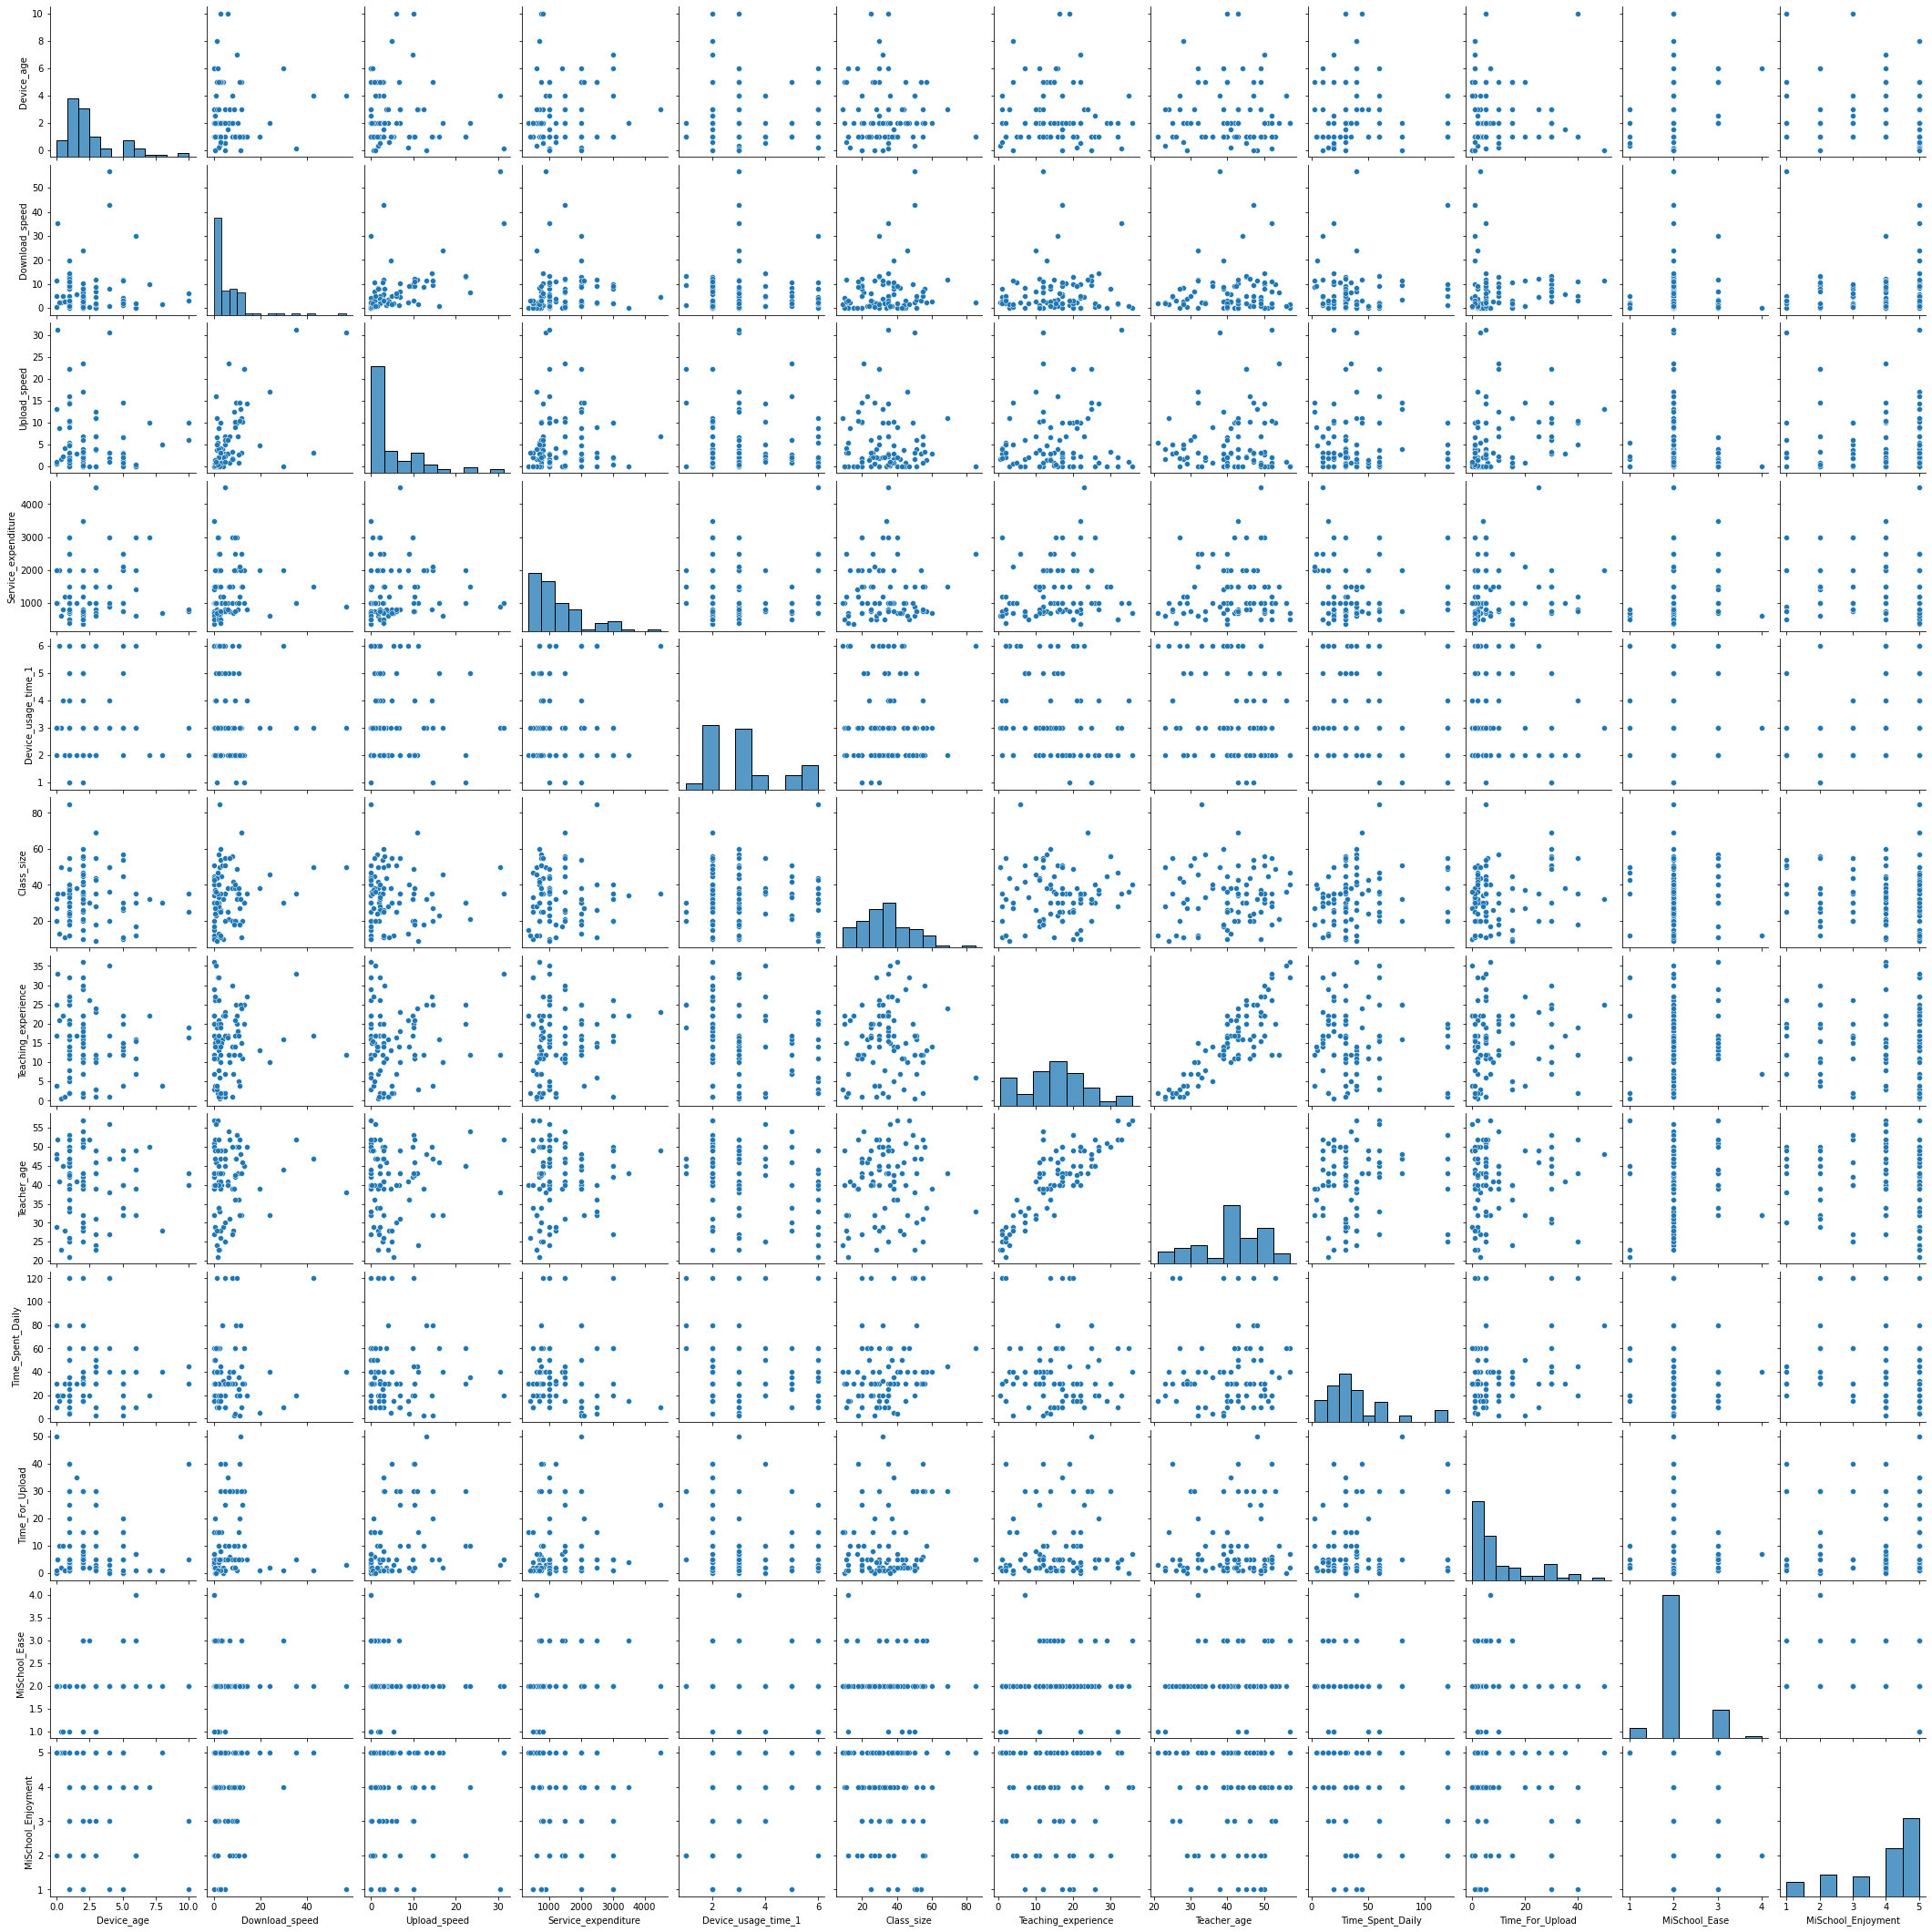

In [7]:
sns.pairplot(df)

In [8]:
df.to_csv(r'Connectivity Data_clean.csv', index=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Download_speed', ylabel='Time_Spent_Daily'>

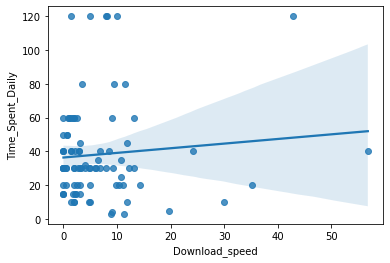

In [9]:
#create scatterplot with regression line and confidence interval lines
sns.regplot(df['Download_speed'], df['Time_Spent_Daily'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Upload_speed', ylabel='Time_For_Upload'>

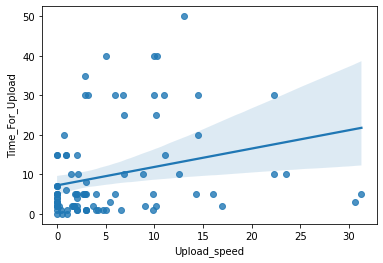

In [10]:
sns.regplot(df['Upload_speed'], df['Time_For_Upload'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Download_speed', ylabel='Time_For_Upload'>

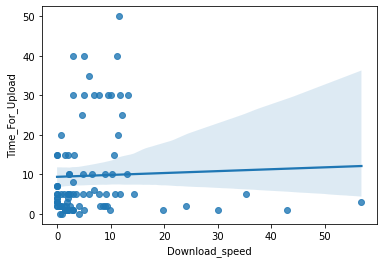

In [11]:
sns.regplot(df['Download_speed'], df['Time_For_Upload'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Upload_speed', ylabel='Time_Spent_Daily'>

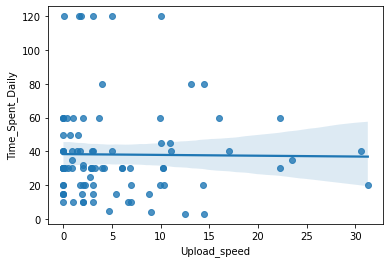

In [12]:
sns.regplot(df['Upload_speed'], df['Time_Spent_Daily'])